# Heat inside Earth

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   23nd of February 2024

## Exercise 8: Plume rise and heat budget

### Part 1: Simplified plume model

The heat transported by the motion of mantle material is this exercise's topic. The first task is to estimate the heat flow ($q$) out of the Hawaiian plume. From tomographic images, you resolve the hot material to be flowing up a vertical pipe of radius $R = 50~km$. You also make out that the temperature difference between the hot material and the surrounding mantle is $\Delta T = 100~^{\circ}C$. Assume a vertical velocity up the pipe of $v = 1~m/yr$.

The volume that flows past a point on a pipe within unit-time is $V = \pi R^2 v$, where $v$ is the velocity of the flow. The amount of extra heat that has been carried past this points within unit-time is:

$$ q = V \cdot \rho_P \cdot C_p \cdot \Delta T $$

where $\rho_P = 3300~kg/m^3$ is the density of the plume material, $C_p = 1000~J kg^{-1}C^{-1}$ is the specific heat capacity of the plume, and $\Delta T$ is the temperature difference between the hot material and the surrounding mantle. 

Perform the following exercise:

1. Based on the given parameter values, estimate the order of heat flow out of the Hawaiian plume?

2. Calculate the heat flux (heat flow per unit area) out of the plume. 

3. How does this compare to the average heat flux (units of $W/m^2$) of the Earth's oceanic and continental crust? 

<br>

### Part 2: More realistic approach

In all honesty, using a perfectly cylindrical pipe is unrealistic - plus tomographic methods generally lack the resolution to resolve such thin features. Researchers have long developed alternative methods to estimate the heat flow out of plumes, in hopes to fully account for the Earth's heat budget. Namely, for the case of an upwelling plume, heat flow can be related to buoyancy flux ($Q_B$) by assuming that the excess buoyancy is generated by thermal expansion. According to Hoggard et al. (2020) [https://doi.org/10.1016/j.epsl.2020.116317]:

$$ q = \frac{C_P}{\alpha} \cdot Q_B$$

where $\alpha = 3 \cdot 10^-5~C^-1$ is thermal expansivity, and $Q_B$ is buoyancy flux expressed in units of Mg/s (1 Mg = 10^3 kg). 

Sleep (1990) [https://doi.org/10.1029/JB095iB05p06715] described a method for constraining buoyancy flux for plumes located away from plate margins by measuring the rate at which new swell topography is generated and assuming that it is supported by thermal isostasy. If excess buoyancy is generated within the lithosphere, it moves downstream at the velocity of the overriding plate. The buoyancy flux ($Q_B$) can then be calculated by combining plate velocity ($v_p$) with the cross-sectional area of the swell above the conduit ($A$), measured perpendicular to the direction of plate motion. Thus:

$$Q_B = (\rho_P - \rho_W) \cdot A \cdot v_p$$

where $\rho_P = 3300 kg~m^{-3}$ is the density of the mantle plume, $\rho_W = 1000 kg~m^{-3}$ is the density of the water, $A$ is the cross-sectional swell area perpendicular to plate motion and $v_p$ is the plate velocity.


Perform the following exercises:

4. Calculate the buoyancy flux and heat flow out of the Hawaiian plume. Use present-day geodetic plate motion models (namely REVEL, Sella et al., 2002) to estimate the plate velocity. The cross-sectional area of the swell can be estimated from the residual bathymetry of the Hawaiian swell, assuming a conical shape (see function `add_residual_tomography_hawaii` below).

5. How does this compare to the Part 1 estimation? You can also compare your buoyancy flux results against Sleep's estimate, by checking the file `BUOYANCY_FLUXES.txt`. Below in the notebook you will find the loading of this file as a pandas dataframe.  

<br>

### Part 3: Global heat budget

Estimates from hotspots global network yield a cumulative lower bound on global plume flux of $2~TW$, if all buoyancy is assumed to be thermal in origin. In the text file `BUOYANCY_FLUXES.txt` you will find the buoyancy flux for many plumes, in units of Mg/s (1 Mg = 10^3 kg). The data is taken from Table 2 in Hoggard et al. (2020).

6. Based on the expression that relates heat flow ($q$) and buoyancy flux ($Q_B$), calculate the heat flow for all the plumes listed in the file `BUOYANCY_FLUXES.txt`. The code for this step is not written, and there are in fact many ways to tackle this. The most intuitive way might be some form of iteration. Take your time and try to come up with a code that does the job for all plumes. 

7. Compare the cumulative heat flow from all plumes to the lower bound estimate of $2~TW$.

<br>

***
References:  
- Hoggard, M. J., Parnell-Turner, R., & White, N. (2020). Hotspots and mantle plumes revisited: Towards reconciling the mantle heat transfer discrepancy. Earth and Planetary Science Letters, 542, 116317.
- Sella, G. F., Dixon, T. H., & Mao, A. (2002). REVEL: A model for recent plate velocities from space geodesy. Journal of Geophysical Research: Solid Earth, 107(B4), ETG-11.
- Sleep, N. H. (1990). Hotspots and mantle plumes: Some phenomenology. Journal of Geophysical Research: Solid Earth, 95(B5), 6715-6736.




In [6]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_SCRIPTS = '/content/gdrive/MyDrive/2024-Geodynamics/SCRIPTS'


# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)


from map_dependencies import geodesic_distance, add_residual_bathymetry_hawaii
from surfvel_dependencies import sph2cart, ev_to_surfvel_total

### Part 1: Simplified plume model

This part should be simple enough to be solve with pen and paper. Before using values, try to obtain an expression for the velocity of the flow, that is, a function were all parameters but $v$ are on the right side. Then, use the given values to calculate the velocity of the flow.

The heat flux is nothing more than the heat flow divided by unit area, in this case, the cross-sectional area of the plume. Compare with the continental and oceanic crust heat fluxes from literature (or work it out from table in Module 4 lecture).

In [8]:
def f_heat_flow(R, v, rho, Cp, dT):
    return np.pi * R**2 * v * rho * Cp * dT


R = 50e3     # m
rho = 3300   # kg/m^3
Cp = 1000    # J/kg/C
dT = 100     # C
v = 1 / (365 * 24 * 3600)     # m/s

heat_flow = f_heat_flow(R, v, rho, Cp, dT)
f"Heat flow: {heat_flow:.2e} J/s = {heat_flow/1e12:.2f} TW"

'Heat flow: 8.22e+10 J/s = 0.08 TW'

In [9]:
heatflow_hawaii_pipe = heat_flow 
area_hawaii_pipe = (np.pi * R**2)    # To calculate the cross-sectional area of the pipe (i.e. a circle)

heat_flux_hawaii_pipe = heatflow_hawaii_pipe / area_hawaii_pipe
f"Heat flux Hawaii: {heat_flux_hawaii_pipe:.2f} W/m^2" 

'Heat flux Hawaii: 10.46 W/m^2'

In [10]:
heatflow_oceans = 31.2e12   # Values taken from Table 7.3 in Fowler (2005)
area_oceans = 309e12

heat_flux_oceans = heatflow_oceans / area_oceans
print(f"Heat flux oceans: {heat_flux_oceans:.2f} W/m^2")


heatflow_continents = 13.1e12
area_continents = 201e12

heat_flux_continents = heatflow_continents / area_continents
print(f"Heat flux continents: {heat_flux_continents:.2f} W/m^2")

Heat flux oceans: 0.10 W/m^2
Heat flux continents: 0.07 W/m^2


<br>

### Part 2: More realistic Approach

Below you will find the python version of the functions described in the exercise. You can use these functions to calculate the buoyancy flux (`f_buoyancy_flux`) and heat flow (`f_heat_flow`) out of the Hawaiian plume. Feel free to write your own functions if you prefer. If not, pay careful attention to the units of the parameters and the output.

In [11]:
def f_buoyancy_flux(rho_p, A, vp):
    """ Calculates the buoyancy flux of a plume

    Parameters
    ----------
    rho_p : float
        Density of the plume in [kg/m^3].
    A : float
        Cross-sectional area of the plume in [m^2].
    vp : float
        Velocity of the overriding plate in [cm/yr].

    Returns
    -------
    float
        Buoyancy flux in [kg/s]
    """
    
    rho_w = 1000    # Density of the water in [kg/m^3]
    return (rho_p - rho_w) * A * vp /(100*3600*24*365)



def f_heat_flow(Q_B, Cp):
    """Calculates the heat flow from the buoyancy flux

    Parameters
    ----------
    Q_B : float
        Buoynacy flux in [kg/s].
    Cp : float
        Specific heat capacity in [J/kg /C].

    Returns
    -------
    float
        Heat flow in [W] or [J/s]
    """
    
    alpha = 3e-5    # Thermal expansivity in [C^-1]
    return Cp / alpha * Q_B

By the formulation of the problem, you will need to calculate the buoyancy flux in order to obtain a value for the heat flow. To that end, we first need estimates for the cross-sectional swell area perpendicular to plate motion ($A$) and the plate velocity itself ($v_p$). 

Starting with the cross-sectional swell area: you will need to use the bathymetry data from the Hawaii plume. Or more specifically, the residual bathymetry data, defined here as the difference between the predicted depth to basement according to thermal subsidence of normal oceanic lithosphere and the observed (sediment unloaded) basement depth. This way one eliminates all signals unrelated to plume-induced thermal swelling. See the usage of the function `add_residual_tomography_hawaii` below to create a residual bathymetry map.

#### Cross-sectional swell area

The mapping function `add_residual_bathymetry_hawaii` plots the residual bathymetry data from the CEED Resources (https://www.earthdynamics.org/page5.html).

The map below shows the residual bathymetry surrounding the Hawaii swell (seudo-traingular white shape in the middle). You should also be able to identify the volcanic track of hotspots that were formed in the past, as the plate moved over the Hawaiian plume (WNW track from the main island). 

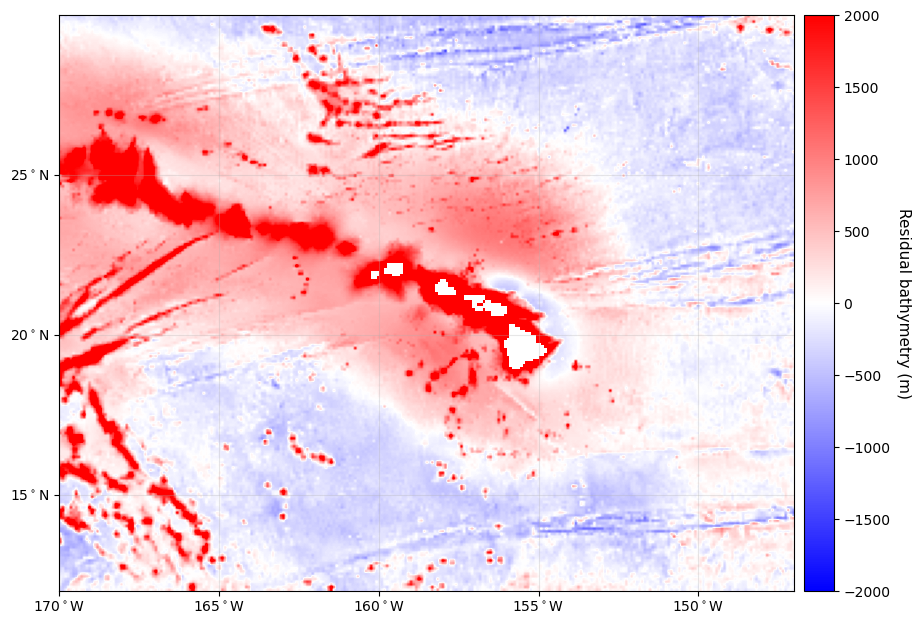

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
add_residual_bathymetry_hawaii(fig, ax,
                               colormap="bwr",
                               map_range=[-2000, 2000])

Now, in order to estimate the cross-sectional swell area perpendicular to plate motion, we need to assess the vertical and horizontal extension of said swell. Use the above map and colorbar to do that. For the horizontal extend, you may find it useful to plot two point that mark the cross-section (with `ax.plot`), and measure the distance between them (with `geodecis_distance`). 

To estimate the area you may assume a conical shape for the swell. 

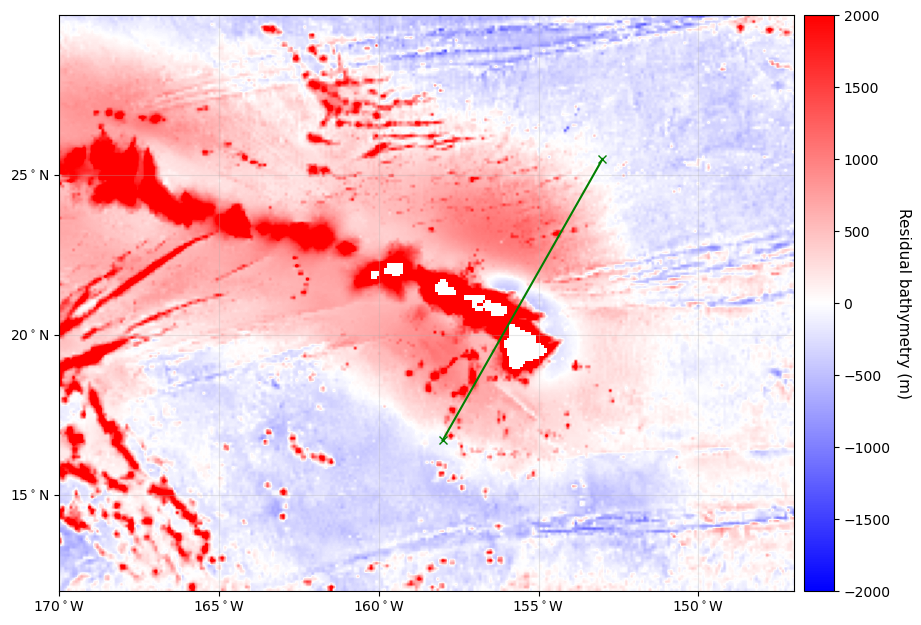

In [13]:
pntlon1, pntlat1 = -158.0, 16.7     # To plot the edges of the Hawaiian swell along a cross-section from the Pacific's plate motion
pntlon2, pntlat2 = -153.0, 25.5

ax.plot([pntlon1, pntlon2], [pntlat1, pntlat2], 'x-', color="green")
fig

In [14]:
section_length = geodesic_distance(pntlon1, pntlat1, pntlon2, pntlat2)      # The output from geodesic_distance is in meters
print(f"Cross-section length: {section_length/1e3:.2f} km")

Cross-section length: 1107.14 km


In [16]:
section_height = 2000.0   # To use the maximum height of the Hawaiian swell, seen from the map's colorbar

section_area = section_length * section_height / 2          # This is the function for the cross section of a cone (i.e. a triangle). If you keep section_length and section_height in meters, the output will be in m^2.
print(f"Cross-section area: {section_area/1e6:.2f} km^2")
print(f"Cross-section area: {section_area:.2f} m^2")

Cross-section area: 1107.14 km^2
Cross-section area: 1107137005.52 m^2


#### Plate velocity ($v_p$)

For the plate velocity ($v_p$), use your knowledge from previous exercises to calculate the surface velocity at the coordinates of Hawaii. A good idea would be to use the REVEL dataset. You will need to:
- Upload the data
- Identifying the name of the plate moving above the Hawaiian plume. 
- Make the usual transformations and calculation to obtain the plate velocity at the coordinates of Hawaii (functions `revel_to_cart_degMyr` and `ev_to_surfvel_total`).

In [17]:
revel_path = os.path.join(path_to_data, "REVEL_SELLA2002_TABLE3.txt")
revel_ev_df = pd.read_csv(revel_path, delimiter=' ', index_col=0)

def revel_to_cart_degMyr(plate):
    
    # Euler vector from [rad/Myr] to [deg/Myr]
    revel_cart = revel_ev_df.loc[plate][["wX", "wY", "wZ"]] * (180/np.pi)
    return revel_cart

In [20]:
pacific_ev = revel_to_cart_degMyr("Pa")
pacific_vel = ev_to_surfvel_total(pacific_ev, pnt_lon=-155.5, pnt_lat=19.5)

print(f"Velocity of the Pacific plate in Hawaii: {pacific_vel:.2f} cm/yr")

Velocity of the Pacific plate in Hawaii: 6.92 cm/yr


#### Buoyancy flux and heat flow

We will now make use of the functions `f_buoyancy_flux` and `f_heat_flow` to calculate the buoyancy flux and heat flow out of the Hawaiian plume. Be mindful of the units of the parameters and the output. 

In [19]:
?f_buoyancy_flux

Signature: f_buoyancy_flux(rho_p, A, vp)
Docstring:
Calculates the buoyancy flux of a plume

Parameters
----------
rho_p : float
    Density of the plume in [kg/m^3].
A : float
    Cross-sectional area of the plume in [m^2].
vp : float
    Velocity of the overriding plate in [cm/yr].

Returns
-------
float
    Buoyancy flux in [kg/s]
File:      c:\users\nbt571\appdata\local\temp\ipykernel_30380\891303996.py
Type:      function

In [21]:
rho_p = 3300.0          # The density of the plume in kg/m^3, given in the exercise paper
#section_area = 0.0     # No need to redefine this variable, as it was already defined in the previous cell 
plate_vel = 6.92        # Present-day absolute velocity of the Pacific plate in cm/yr, calculated from the REVEL model


buoyancy_flux_hawaii = f_buoyancy_flux(rho_p, section_area, plate_vel)
print(f"Bouyancy flux Hawaii: {buoyancy_flux_hawaii:.2e} kg/s = {buoyancy_flux_hawaii/1e3:.2f} Mg/s")

Bouyancy flux Hawaii: 5.59e+03 kg/s = 5.59 Mg/s


In [22]:
Cp = 1000.0               # Specific heat capacity (in J/kg/C), given in the exercise paper

heat_flow_hawaii = f_heat_flow(buoyancy_flux_hawaii, Cp)
print(f"Heat flow Hawaii: {heat_flow_hawaii:.2e} J/s = {heat_flow_hawaii/1e12:.2f} TW")

Heat flow Hawaii: 1.86e+11 J/s = 0.19 TW


We can compare the heat flow results with the estimation from Part 1. Are they in the same order of magnitude?

Next, we are tasks with calculating the heat flow of the Hawaiian plume using the buoyancy flux estimated by Sleep (1990). The file `BUOYANCY_FLUXES.txt` contains the buoyancy flux for many plumes (according to different authors), in units of Mg/s (1 Mg = 10^3 kg). The data is taken from Table 2 in Hoggard et al. (2020). See the loading of this file as a pandas dataframe below, and how to access the buoyancy flux for the Hawaiian plume.

In [23]:
buoy_path = os.path.join(path_to_data, "BUOYANCY_FLUXES.txt")   # Values are in Mg/s.
buoy_df = pd.read_csv(buoy_path, delimiter='\t', index_col=0)
buoy_df.head(5)    # To print the first 5 rows of the dataframe (it is a very long dataframe)

,Sleep1990,K&A2014,Hoggard2020
Afar,1.2,2.14,3.29
Ascension,–,0.11,0.36
Azores,1.1,0.38,0.85
Baja,0.3,0.01,0.00
Balleny,–,0.04,2.22


In [24]:
buoy_df.loc['Hawaii']   # To access data from a dataframe by row, we use the .loc instruction.

Sleep1990       8.7
K&A2014        4.90
Hoggard2020    2.78
Name: Hawaii, dtype: object

In [25]:
?f_heat_flow

Signature: f_heat_flow(Q_B, Cp)
Docstring:
Calculates the heat flow from the buoyancy flux

Parameters
----------
Q_B : float
    Buoynacy flux in [kg/s].
Cp : float
    Specific heat capacity in [J/kg /C].

Returns
-------
float
    Heat flow in [W] or [J/s]
File:      c:\users\nbt571\appdata\local\temp\ipykernel_30380\891303996.py
Type:      function

In [26]:
buoyancy_flux_hawaii_sleep = 8.7e3    # Buoyancy flux in kg/s. Values from the dataframe are given in Mg/s, so we need to multiply by 1e3.

heat_flow_hawaii_sleep = f_heat_flow(buoyancy_flux_hawaii_sleep, Cp)     

If you have finished all the calculations thus far, you will have three different estimates for the heat flow out of the Hawaiian plume. See the values printed below.

In [27]:
print(f'{"Heat flow Hawaii from simple pipe model:": <50}{heatflow_hawaii_pipe/1e12:.2f} TW')
print(f'{"Heat flow Hawaii from residual bathymetry:": <50}{heat_flow_hawaii/1e12:.2f} TW')
print(f'{"Heat flow Hawaii from Sleep 1990:": <50}{heat_flow_hawaii_sleep/1e12:.2f} TW')

Heat flow Hawaii from simple pipe model:          0.08 TW
Heat flow Hawaii from residual bathymetry:        0.19 TW
Heat flow Hawaii from Sleep 1990:                 0.29 TW


<br>


### Part 3: Global heat flow by plumes

Estimates from magmatic hotspots yield a cumulative lower bound on global plume flux of $2~TW$, if all buoyancy is assumed to be thermal in origin. In the text file `BUOYANCY_FLUXES.txt` you will find the buoyancy flux for many plumes, in units of Mg/s (1 Mg = 10^6 kg). The data is tacken from Hoggard et al., 2020 (https://doi.org/10.1016/j.epsl.2020.116317). The dataframe contains rows for each plume, and three columns which contain the buoyancy flux of each plume as obtained from different authors. Of our interest is the most recent one, Hoggard et al., 2020. You can access all the values in the column by using the following command:

```python
buoy_df['Hoggard2020']
```
or each row with:
    
```python
buoy_df.loc['Hawaii']
```

The buoyancy flux for the Iceland plume according to Hoggard et al., 2020 is $4.07~Mg/s$. This values can be accessed as illustrated below:

In [ ]:
iceland_buoy = buoy_df["Hoggard2020"]["Iceland"]
f"Iceland bouyancy flux: {iceland_buoy} Mg s-1"

Now, based on the expression that relates heat flow ($q$) and buoyancy flux ($Q_B$), you are tasked with calculating the heat flow for all the plumes listed in the file `BUOYANCY_FLUXES.txt`. The code for this step is not written, and there are in fact many ways to tackle this. The most intuitive way might be some form of iteration. Take your time and try to come up with a code that does the job for all plumes. If you are feeling cheeky, you can try to have a *certain language model* do the code for you (you will need to be very descriptive of your problem, and likely do some fixes afterwards).

Once you have calculated the heat flow for all the plumes listed under the `Hoggard2020` column of the `bouy_df` dataframe, find a way to add all the contributions into a **total** value. Compare this value with the literature estimate (~$2~TW$).

Given that the heat capacity remains constant for all plumes (the only other parameter in function `f_heat_flow`), you could also calculate the **total** buoyancy flux, and calculate the heat flow from that. The result should be the same, and the method might prove easier to implement.

Below you will find four possible approaches:

In [43]:
# Approach 1: Iterate with the iterrows() method, and append the individual heat-flow results to a list

heat_flow_list = []

for index, row in buoy_df.iterrows():                       # To iterate over the rows of the dataframe
    
    heat_flow = f_heat_flow(row["Hoggard2020"] * 1e3, Cp)   # To calculate the heat flow from the buoyancy flux
    heat_flow_list.append(heat_flow)                        # To append the heat-flow value to the list
    

total_hf1 = np.sum(heat_flow_list)                          # To sum the values of the list
print(f"Total heat flow: {total_hf1/1e12:.2f} TW")
    

Total heat flow: 1.54 TW


In [44]:
# Approach 2: Iterate with the iterrows() method, and add the individual heat-flow results to a total (total_hf2)

total_hf2 = 0.0

for index, row in buoy_df.iterrows():                       # To iterate over the rows of the dataframe
    
    heat_flow = f_heat_flow(row["Hoggard2020"] * 1e3, Cp)   # To calculate the heat flow from the buoyancy flux
    total_hf3 = total_hf3 + heat_flow                       # To sum the heat-flow value to the total
    
    
print(f"Total heat flow: {total_hf2/1e12:.2f} TW")

Total heat flow: 0.00 TW


In [45]:
# Approach 3: Store the Hoggard2020 in an array (buoy_array), simple iteration, and add the individual heat-flow results to a total (total_hf3)

total_hf3 = 0.0
buoy_array = buoy_df["Hoggard2020"].values

for buoy in buoy_array:                       # To iterate over the array
    
    heat_flow = f_heat_flow(buoy * 1e3, Cp)   # To calculate the heat flow from the buoyancy flux
    total_hf3 = total_hf3 + heat_flow         # To sum the heat-flow value to the total
    
    
print(f"Total heat flow: {total_hf2/1e12:.2f} TW")

Total heat flow: 0.00 TW


In [46]:
# Approach 4: Sum all the buoyancy values from Hoggard2020, and calculate the total heat-flow from the total buoyancy flux

total_buoyancy = buoy_df["Hoggard2020"].sum()           # To sum the buoyancy values of the "Hoggard2020" column
total_hf4 = f_heat_flow(total_buoyancy * 1e3, Cp)       # To calculate the heat flow from the total buoyancy

print(f"Total heat flow: {total_hf4/1e12:.2f} TW")

Total heat flow: 1.54 TW
